# 전이학습의 기초 
* 사람은 서로 다른 과제 간에 지식을 전이하는 고유한 능력을 가지고 있습니다. 
* 어떤 과제를 통해 배운 지식이 있다면 같은 방식을 활용해 관련 작업을 해결합니다. 
* 업무 관련성이 높을수록 지식을 전이하거나 교차 활용하는 것이 더 쉬워집니다. 
------------
* 전이학습의 아이디어는 고립된 학습 패러다임을 극복하고 하나의 과제에서 습득한 지식을 활용해 관련된 새로운 과제를 해결하자는 것 
* 전이학습은 사람이 여러 과제를 넘나들면서 지식을 활용하는 것보다 직접적이고 한 단계 더 발전된 방식으로 데이터를 배워 나갑니다. 
* 따라서 전이학습은 다른 관련된 과제에 대한 지식이나 모델을 재사용하는 하나의 방법이 됩니다. 
--------------
#### 전이학습의 정의 : 한 설정에서 학습한 것을 다른 설정의 일반화를 개선하기 위해 활용하는 것

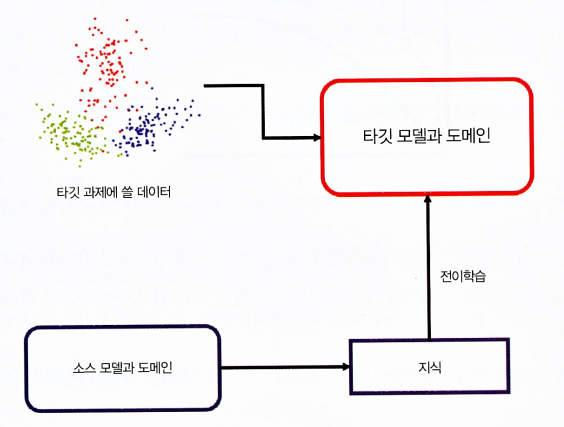

* 소스 과제에서 습득한 지식을 타깃 과제 학습 시 추가로 입력한다.

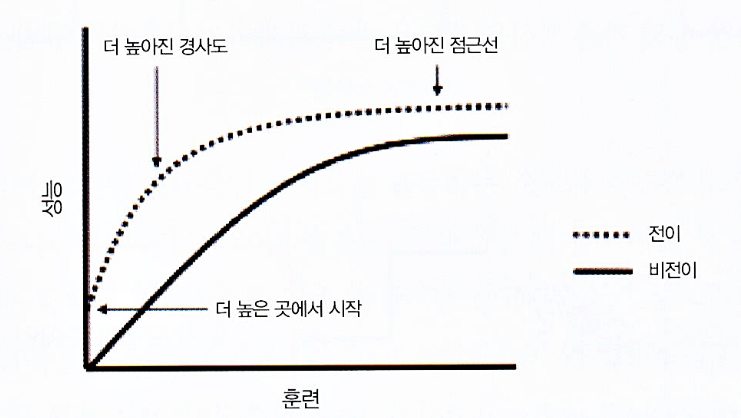

# 전이학습의 방법
* 딥러닝 시스템은 전통적인 머신러닝 시스템보다 더 많은 훈련 시간과 데이터의 양이 필요로 합니다. 
* 다양한 최첨단의 딥러닝 네트워크가 컴퓨터 비전 및 자연어 처리(NLP)와 같은 영역 전반에서 개발되고 테스트 되었습니다. 
* 대부분의 경우 팀/연구자는 다른 사람들이 사용할 수 있도록 이러한 네트워크의 세부 사항을 공유합니다. 
* 이렇게 사전 훈련된 네트워크/모델은 딥러닝 맥락에서 전이학습의 기초가 됩니다 

## 특성 추출 
* 딥러닝의 체계는 서로 다른 층에서 서로 다른 특성을 학습하는 층이 있는 아키텍처 
* 이 층은 최종 출력을 얻기 위해 마지막 층(분류의 경우 보통 전체가 연결된 층)에 연결
* 이 층 아키텍처 덕분에 최종 층에서 고정된 특성 추출기 없이 사전 훈련된 네트워크(V3 or VGG같은 모델)를 활용해 작업할 수 있다.
* 아래 그림은 특성 추출을 기반으로 한 심층 전이를 표현한 것

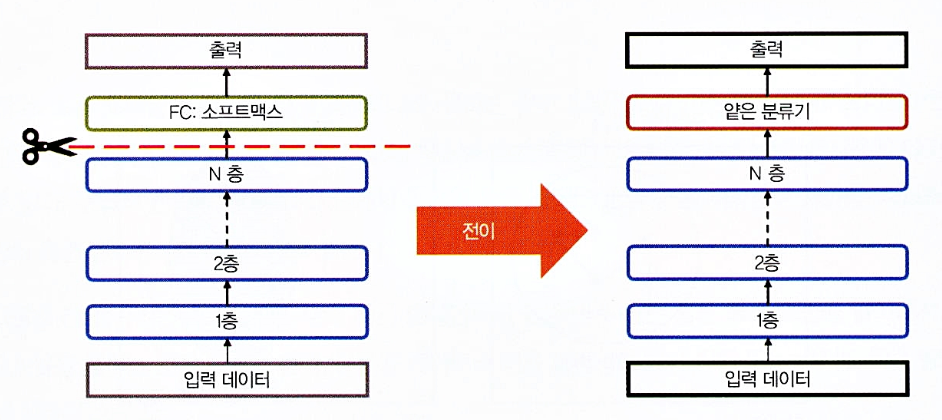

## 미세 튜닝
* fine turning은 좀 더 복잡한 기술로, 단순히 최종 층을 대체하는 것뿐만 아니라 이전층의 일부를 선택적으로 재훈련시키기도 합니다.
* 심층 신경망은 다양한 하이퍼 파라미터를 통해 변경이 가능한 아키텍처입니다.
* 초기 층은 일반적인 특성을 포착하는 반면, 나중 층은 특정 작업에 더 초점을 맞춘다. 
* 재훈련하는 동안 특정 층을 고정(가중치를 고정)하거나 필요에 맞게 나머지 층을 미세 튜닝할 수 있을 것입니다. 
* 이 경우 네트워크의 전체 아키텍처 지식을 활용해 재훈련 단계의 시작점으로 사용합니다. 결국, 이는 더 적은 학습 시간으로 더 나은 성과를 달성하는데 도움이 됩니다. 

# 사전 훈련 모델 
* 전이학습의 기본 요구사항 중 하나는 소스 과제에서 잘 수행된 모델이 존재해야 한다는 것입니다. 
* 다행히 딥러닝 모델을 연구하는 팀들은 결과만 공유하는 것이 아니라 사전 훈련된 모델도 보통 같이 공유합니다. 
* 사전 훈련된 모델은 보통 모델이 안정된 상태로 훈련되는 동안 모델이 가진 수백만 개의 파라미터/가중치 형태로 공유됩니다. 
* VGG16, InceptionV3와 같이 사전 훈련된 다양한 모델을 케라스에서 내려받을 수 있습니다. 

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

* 개? 아니면 고양이?

In [24]:
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in train_files]

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('\\')[1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [3]:
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


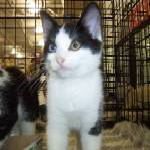

In [4]:
print(train_imgs[0].shape)
array_to_img(train_imgs[0])

In [9]:
batch_size = 30
num_classes = 2
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

print(train_labels[1495:1600], train_labels_enc[1495:1600])

['cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [10]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [14]:
3 * 3 * 3 * 16 + 16

448

In [15]:
16 * 3 * 3 * 64 + 64

9280

In [16]:
64 * 3 * 3 * 128 + 128

73856

In [18]:
17 * 17 * 128

36992

In [20]:
36992 * 512 + 512

18940416

In [21]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 44s 431ms/step - loss: 0.7888 - accuracy: 0.5477 - val_loss: 0.6403 - val_accuracy: 0.6690
Epoch 2/30
100/100 [==============================] - 42s 425ms/step - loss: 0.6705 - accuracy: 0.6250 - val_loss: 0.5787 - val_accuracy: 0.7110
Epoch 3/30
100/100 [==============================] - 42s 423ms/step - loss: 0.6038 - accuracy: 0.6873 - val_loss: 0.5491 - val_accuracy: 0.7140
Epoch 4/30
100/100 [==============================] - 46s 465ms/step - loss: 0.5318 - accuracy: 0.7303 - val_loss: 0.5238 - val_accuracy: 0.7380
Epoch 5/30
100/100 [==============================] - 42s 419ms/step - loss: 0.4680 - accuracy: 0.7757 - val_loss: 0.5341 - val_accuracy: 0.7410
Epoch 6/30
100/100 [==============================] - 43s 428ms/step - loss: 0.3767 - accuracy: 0.8253 - val_loss: 0.5549 - val_accuracy: 0.7460
Epoch 7/30
100/100 [==============================] - 43s 431ms/step - loss: 0.2773 - accuracy: 0.8797 - val_loss: 0.6965 - val_ac

In [ ]:
model.save('cats_dogs_basic_cnn_1.h5')

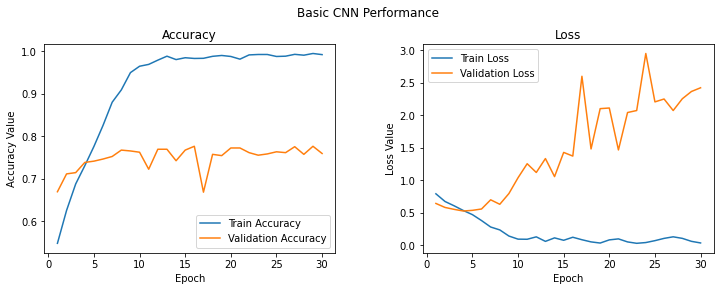

In [22]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

* 위의 그림에서 4,5 에포크 후에 모델이 과대 적합됐다는 것을 알수 있음

In [ ]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

In [ ]:
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,31))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 31, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 31, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
model.save('cats_dogs_basic_cnn_2.h5')